In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Step 1: Data Collection
Start by loading the dataset. For this example, let's assume the dataset is in CSV
format.

In [2]:
# Load the dataset
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')

In [3]:
# Display the first few rows of the dataset
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


# Data Preprocessing

Handle missing values and convert the date column to a proper datetime format.


In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [6]:
# Check for missing values
print(df.isnull().sum())


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [7]:
# Fill missing values (if any) using median for numerical columns or mode for categorical columns
df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9644\1025647872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)


#  Exploratory Data Analysis (EDA)


Visualize trends in EV sales over time, across states, and vehicle categories.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

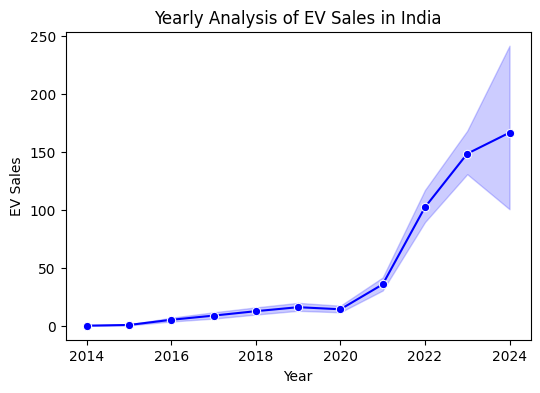

In [9]:
# Plot EV sales over the years
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df,
marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

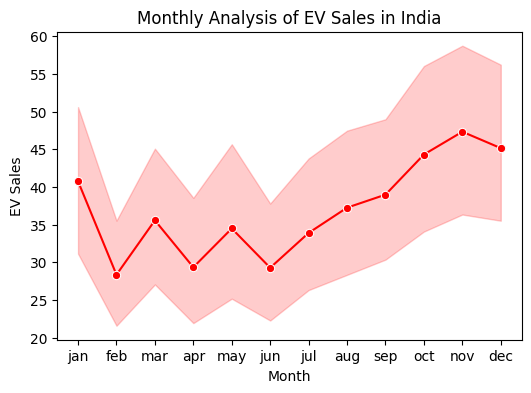

In [10]:
# Monthly Analysis of EV Sales in India
plt.figure(figsize=(6,4))
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df,
marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');


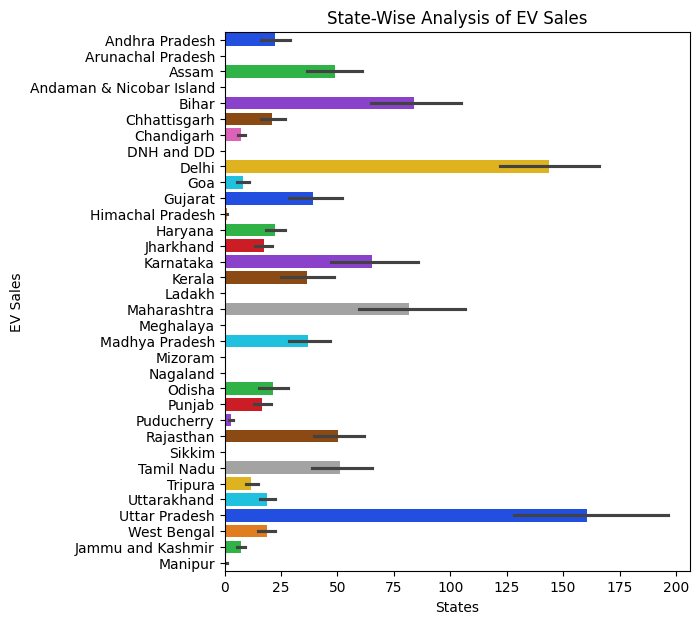

In [11]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df,
hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales');

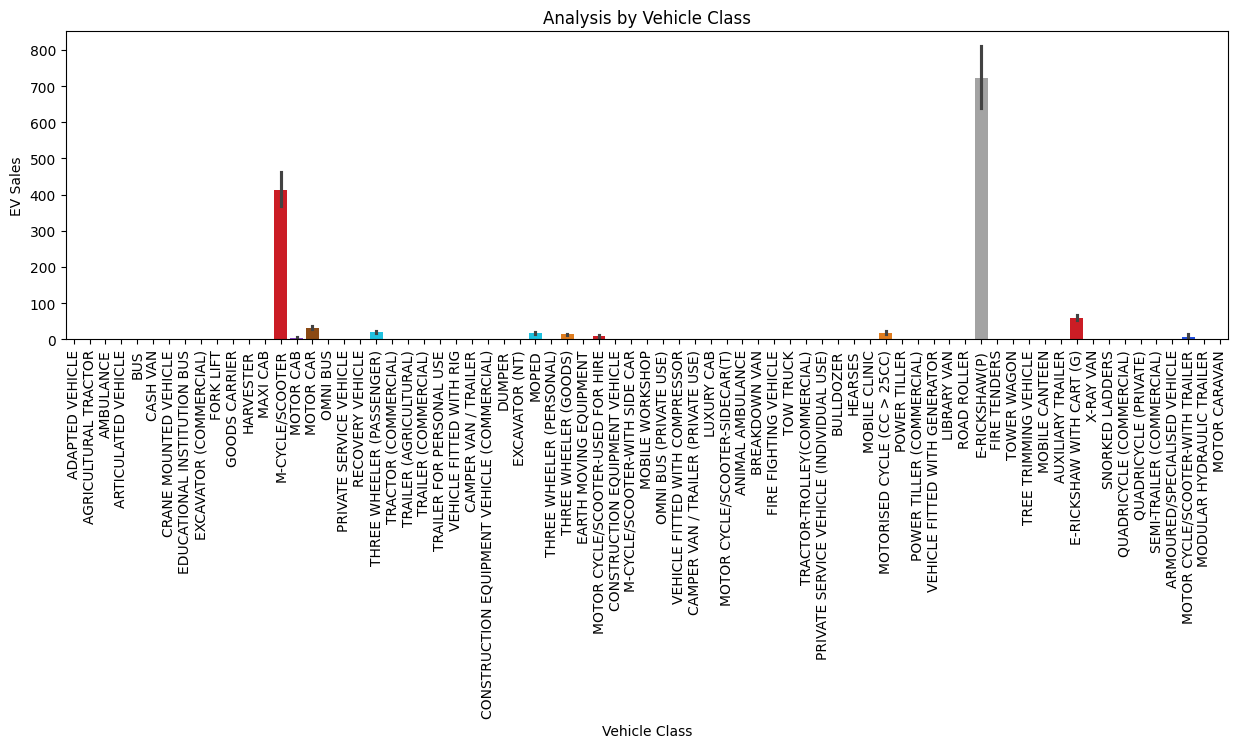

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=df,
hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

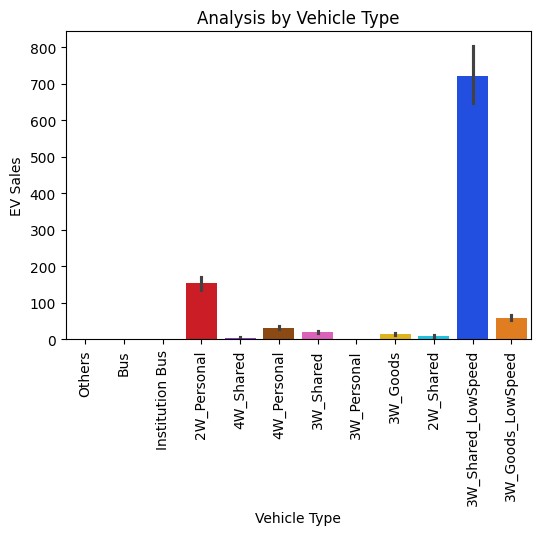

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df,
hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

# Feature Engineering"

Create new features such as month and day from the Date column and encode
categorical variables.


In [14]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [15]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State','Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],drop_first=True)


In [16]:
# Drop unnecessary columns like Date, Month_Name (if already extracted into numerical values)
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

In [17]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1


# Modeling

Use a regression model (e.g., Random Forest Regressor) to predict EV sales.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
# Split the data into features and target variable
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


# Model Evaluation
Check how well the model performs on the test set.


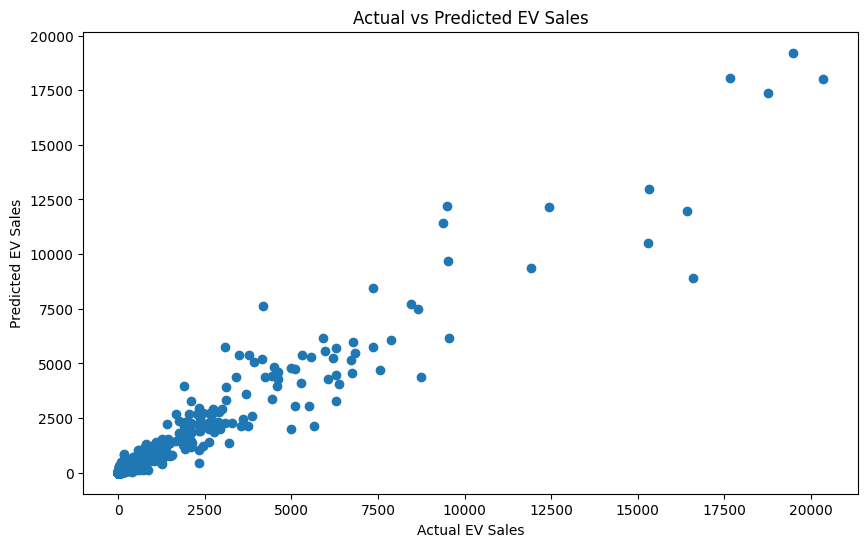

In [22]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

In [23]:
# Check feature importance
importance = model.feature_importances_feature_importance = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)

NameError: name 'importance' is not defined

In [ ]:
# Plot the most important features
plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate and align
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()


# Conclusion
The machine learning model helps in understanding the factors affecting Electric
Vehicle sales across different states and predicting future sales based on historical
data. Feature importance gives insight into which factors (e.g., State, Vehicle
Category) have the highest impact on sales.

Explanation:

● Data Preprocessing: Cleaned the dataset and handled missing values.

● Feature Engineering: Created new columns from the Date column and
encoded categorical variables.

● Modeling: Built a Random Forest Regressor model to predict EV sales and
evaluated its performance using RMSE (Root Mean Squared Error).

● Visualization: Visualized sales trends and feature importance using bar plots and scatter plots